## Some Exlpored Features

In [35]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime as dt
warnings.filterwarnings('ignore') # ignoring every less critical warnings

%matplotlib inline # allows image to show in console

plt.rcParams['figure.figsize']= 8,4 # setting the image plot size

UsageError: unrecognized arguments: # allows image to show in console


In [36]:
# importing the Movie Ratings dataset
movie_review = pd.read_csv('reviews.csv',encoding='latin')
movie_review.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [37]:
# giving the shape of the dataset
print('we have {} number of observations and {} number of columns'.format(movie_review.shape[0],movie_review.shape[1]))
print('\n')
# checking if the dataset has any none available values
print('Checking how many rows in each column has empty or unavailable values \n\
_____________________________________________________________________\n ', movie_review.isna().sum())
print('\n')

#printing out the data structure of the dataset
print('Checking the data structure of the dataset \n\
_____________________________________________________________________\n ')
movie_review.info() # 

we have 608 number of observations and 18 number of columns


Checking how many rows in each column has empty or unavailable values 
_____________________________________________________________________
  Day of Week               0
Director                  0
Genre                     0
Movie Title               0
Release Date              0
Studio                    0
Adjusted Gross ($mill)    0
Budget ($mill)            0
Gross ($mill)             0
IMDb Rating               0
MovieLens Rating          0
Overseas ($mill)          0
Overseas%                 0
Profit ($mill)            0
Profit%                   0
Runtime (min)             0
US ($mill)                0
Gross % US                0
dtype: int64


Checking the data structure of the dataset 
_____________________________________________________________________
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
--

### Data Cleaning

In [38]:
#rename columns
movie_review.columns = ['Day_of_Week', 'Director', 'Genre', 'Movie_Title', 'Release_Date',
       'Studio', 'Adjusted_Gross_mill', 'Budget_mill', 'Gross_mill',
       'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas%',
       'Profit_mill', 'Profit%', 'Runtime_min', 'US_Amill',
       'Gross_%_US']


# changing data types of some features or columns 

movie_review['Adjusted_Gross_mill'] = movie_review.Adjusted_Gross_mill.str.split(',').str.join('').astype(float)

movie_review['Gross_mill'] = movie_review.Gross_mill.str.split(',').str.join('').astype(float)

movie_review['Overseas_mill'] = movie_review.Overseas_mill.str.split(',').str.join('').astype(float)

movie_review['Profit_mill'] = movie_review.Profit_mill.str.split(',').str.join('').astype(float)

movie_review.Day_of_Week =  movie_review.Day_of_Week.astype('category')

movie_review.Director = movie_review.Director.astype('category')

movie_review.Genre = movie_review.Genre.astype('category')

movie_review.Studio = movie_review.Studio.astype(str)

#renaming  some wrong or convertible entries in the studio columns for example 'WB/New Line' = 'WB and New Line Cinema'
# therefore we identify such entries and give it the same entry name
movie_review['Studio'].replace({'Lionsgate' : 'Lionsgate Films','WB/New Line' : 'WB and New Line Cinema',\
                                    'Lionsgate/Summit' : 'Lionsgate Films and Summit Entertainment',
                                    'Pacific Data/DreamWorks': 'Pacific Data and DreamWorks',
                                    'Sony' : 'Sony Picture Classics','Fox' : 'Fox Searchlight Pictures'},inplace=True)

movie_review.Studio = movie_review.Studio.astype('category')

movie_review.Release_Date.astype(str)


# here we are going to re-format the release column
# we would convert the release column to a data formate
# the create a month and year column from the converted release column
# the various entries in the year and month column is then converted to a categorical data type
# then we drop the release date column.
movie_review['Release_Date'] = pd.to_datetime(movie_review['Release_Date'], format ='%d/%m/%Y')
movie_review['month']= movie_review.Release_Date.dt.month
movie_review['year']= movie_review.Release_Date.dt.year

#replacing the month column values to take in the month names
movie_review['month'].replace(list(range(1,13)),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace =True)
movie_review.drop('Release_Date',axis=1, inplace=True )
movie_review['year'] = movie_review.year.astype('category')
movie_review.month = movie_review.month.astype('category')

In [40]:
#printing out the data structure of the cleaned dataset
print('Checking the data structure of the dataset \n\
_____________________________________________________________________\n ')
movie_review.info() # 

Checking the data structure of the dataset 
_____________________________________________________________________
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Day_of_Week          608 non-null    category
 1   Director             608 non-null    category
 2   Genre                608 non-null    category
 3   Movie_Title          608 non-null    object  
 4   Studio               608 non-null    category
 5   Adjusted_Gross_mill  608 non-null    float64 
 6   Budget_mill          608 non-null    float64 
 7   Gross_mill           608 non-null    float64 
 8   IMDb_Rating          608 non-null    float64 
 9   MovieLens_Rating     608 non-null    float64 
 10  Overseas_mill        608 non-null    float64 
 11  Overseas%            608 non-null    float64 
 12  Profit_mill          608 non-null    float64 
 13  Profit%  

## Understanding the data with some summary statistics

frequencies for occurance

In [42]:
day_frequency = movie_review['Day_of_Week'].value_counts()
director_frequency = movie_review['Director'].value_counts()
genre_frequency = movie_review['Genre'].value_counts()
studio_frequency = movie_review['Studio'].value_counts()
year_frequency = movie_review['year'].value_counts()
month_frequency = movie_review['month'].value_counts()

print('Day frequency are as follows')
print(day_frequency)
print('\n\n--------------------------')
print('Director frequency are as follow')
print(director_frequency.head(10))
print('\n\n--------------------------')
print('Year frequency are as follow')
print(year_frequency.head(10))
print('\n\n--------------------------')
print('Month frequency are as follow')
print(month_frequency)
print('\n\n--------------------------')
print('Genre frequency are as follow')
print(genre_frequency)
print('\n\n--------------------------')
print('Studio frequency are as follow')
print(studio_frequency)

Day frequency are as follows
Friday       448
Wednesday    119
Thursday      27
Tuesday       10
Saturday       3
Sunday         1
Name: Day_of_Week, dtype: int64


--------------------------
Director frequency are as follow
Steven Spielberg    19
Robert Zemeckis      9
Michael Bay          8
Tim Burton           7
Ridley Scott         7
Peter Jackson        7
Brett Ratner         6
Roland Emmerich      6
Ron Howard           6
Bryan Singer         6
Name: Director, dtype: int64


--------------------------
Year frequency are as follow
2014    42
2013    39
2010    38
2012    37
2011    34
2009    33
2008    32
2007    26
2004    26
2003    22
Name: year, dtype: int64


--------------------------
Month frequency are as follow
Jun     108
Dec      98
May      96
Nov      84
Jul      75
Mar      36
Aug      34
Oct      24
Feb      21
Sept     13
Apr      13
Jan       6
Name: month, dtype: int64


--------------------------
Genre frequency are as follow
action         236
animation       

checking for maximums Budget_mill IMDb_Rating MovieLens_Rating Overseas_mill Profit% Gross_%_US

In [44]:
movie_review['Budget_mill'].idxmax()
print('movie with the maximun Budget in Millions')
print('-----------------------------------------------------------')
print(movie_review.loc[movie_review['Budget_mill'].idxmax(),:])
print('\n\nmovie with the maximun IMDb_Rating')
print('-----------------------------------------------------------')
print(movie_review.loc[movie_review['IMDb_Rating'].idxmax(),:])
print('\n\nmovie with the maximun MovieLens_Rating')
print('-----------------------------------------------------------')
print(movie_review.loc[movie_review['MovieLens_Rating'].idxmax(),:])
print('\n\nmovie with the maximun Overseas in Millions')
print('-----------------------------------------------------------')
print(movie_review.loc[movie_review['Overseas_mill'].idxmax(),:])
print('\n\nmovie with the maximun Profit%')
print('-----------------------------------------------------------')
print(movie_review.loc[movie_review['Profit%'].idxmax(),:])
print('\n\nmovie with the maximun Gross_%_US')
print('-----------------------------------------------------------')
print(movie_review.loc[movie_review['Gross_%_US'].idxmax(),:])

movie with the maximun Budget in Millions
-----------------------------------------------------------
Day_of_Week                                              Friday
Director                                         Gore Verbinski
Genre                                                    action
Movie_Title            Pirates of the Caribbean: At World's End
Studio                                      Buena Vista Studios
Adjusted_Gross_mill                                      1105.2
Budget_mill                                                 300
Gross_mill                                                963.4
IMDb_Rating                                                 7.1
MovieLens_Rating                                            3.4
Overseas_mill                                               654
Overseas%                                                  67.9
Profit_mill                                               663.4
Profit%                                                   221.1
Ru

lets group by Genre and find the average ratings

In [46]:
print('Genre By Ratings \n-----------------------')
print(movie_review.groupby('Genre')['IMDb_Rating','MovieLens_Rating'].mean())
print('\n\nStudio By Ratings \n-----------------------')
print(movie_review.groupby('Studio')['IMDb_Rating','MovieLens_Rating'].mean()) 

Genre By Ratings 
-----------------------
             IMDb_Rating  MovieLens_Rating
Genre                                     
action          6.790678          3.281271
adventure       7.072000          3.423000
animation       6.976289          3.335979
biography       7.800000          3.779286
comedy          6.585714          3.193736
crime           7.800000          3.761000
documentary     7.550000          3.470000
drama           7.192308          3.471731
fantasy         7.550000          3.581667
horror          6.550000          3.176250
musical         7.000000          3.375000
mystery         6.766667          3.323333
romance         6.883333          3.366667
sci-fi          7.443750          3.545625
thriller        7.253333          3.510667


Studio By Ratings 
-----------------------
                                          IMDb_Rating  MovieLens_Rating
Studio                                                                 
Art House Studios                     

checking top 3 higest rated movies

In [54]:
list_of_top_rated_IMDb = list(movie_review['IMDb_Rating'].sort_values(ascending=False).head(3).index)
list_of_top_rated_MovieLens = list(movie_review['MovieLens_Rating'].sort_values(ascending=False).head(3).index)

print('TOP 3 RATED ACCORDING TO IMDb\n--------------------------------------------')

print(movie_review.loc[list_of_top_rated_IMDb,:])
print('\n\nTOP 3 RATED ACCORDING TO MOVIE LENS\n--------------------------------------------')

print(movie_review.loc[list_of_top_rated_MovieLens,:])

TOP 3 RATED ACCORDING TO IMDb
--------------------------------------------
    Day_of_Week              Director    Genre  \
589   Wednesday  Francis Ford Coppola    crime   
569      Friday     Christopher Nolan   action   
592   Wednesday         Peter Jackson  fantasy   

                                       Movie_Title              Studio  \
589                                  The Godfather  Paramount Pictures   
569                                The Dark Knight                  WB   
592  The Lord of the Rings: The Return of the King     New Line Cinema   

     Adjusted_Gross_mill  Budget_mill  Gross_mill  IMDb_Rating  \
589               1394.4          7.0       245.1          9.2   
569               1109.6        185.0      1004.6          9.0   
592               1447.4         94.0      1119.9          8.9   

     MovieLens_Rating  Overseas_mill  Overseas%  Profit_mill  Profit%  \
589              4.36          110.1       44.9        238.1   3401.4   
569             

### The General View

In [59]:
movie_review.describe(include = 'all' )

,Day_of_Week,Director,Genre,Movie_Title,Studio,Adjusted_Gross_mill,Budget_mill,Gross_mill,IMDb_Rating,MovieLens_Rating,Overseas_mill,Overseas%,Profit_mill,Profit%,Runtime_min,US_Amill,Gross_%_US,month,year
count,608,608,608,608,608,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608,608.0
unique,6,337,15,608,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,45.0
top,Friday,Steven Spielberg,action,"The Chronicles of Narnia: The Lion, the Witch ...",WB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2014.0
freq,448,19,236,1,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,42.0
mean,NaN,NaN,NaN,NaN,NaN,545.153125,92.467928,413.466118,6.923849,3.340378,246.332237,57.698849,320.945559,719.278783,117.781250,167.135197,42.301151,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,438.996563,59.421407,258.612104,0.925890,0.454071,184.581069,12.334237,233.887737,1942.807248,23.179122,92.465903,12.334237,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,202.100000,0.600000,200.300000,3.600000,1.490000,46.900000,17.200000,19.900000,7.700000,30.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,316.950000,45.000000,246.600000,6.375000,3.037500,135.525000,49.900000,180.700000,201.850000,100.000000,106.950000,33.700000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,425.950000,80.000000,327.750000,6.900000,3.365000,189.650000,58.200000,247.700000,338.550000,116.000000,141.700000,41.800000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,645.625000,130.000000,475.500000,7.600000,3.672500,283.650000,66.300000,389.750000,650.100000,130.250000,202.100000,50.100000,NaN,NaN


### Data Visualization

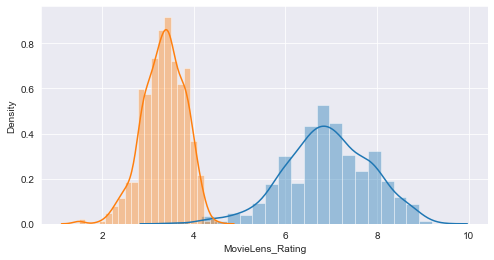

In [62]:
Imdb_Dist = sns.distplot(movie_review['IMDb_Rating'])


MovieLens_Dist = sns.distplot(movie_review['MovieLens_Rating'])

As noted from the data we can confirm that IMDb rating is on a scale of 10 while MovieLens_Rating is on a scale of 5

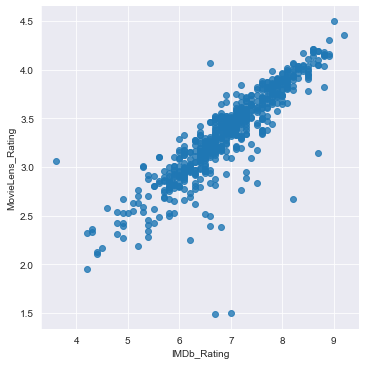

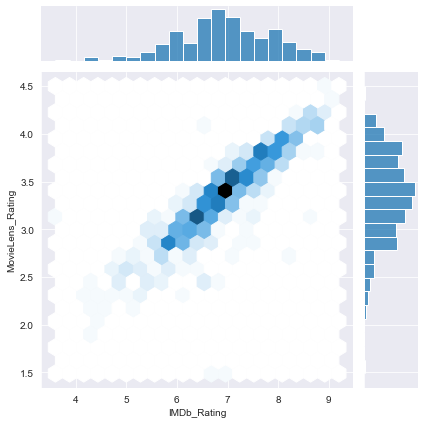

In [61]:
vis2= sns.lmplot(data= movie_review, x= 'IMDb_Rating', y= 'MovieLens_Rating',fit_reg=False)

sns.set_style('darkgrid')
vis4 = sns.jointplot(data=movie_review, x='IMDb_Rating', y='MovieLens_Rating',kind='hex' )

from the above we see a very strong relationship between the 2 ratings. One could say that this raters actually use some special criterias in rating this movies since their rating is strongly related.

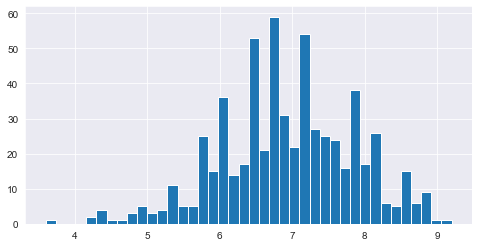

In [64]:
h1=plt.hist(movie_review.IMDb_Rating, bins=40)

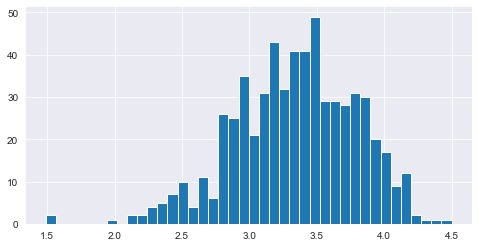

In [65]:
h2 = plt.hist(movie_review.MovieLens_Rating, bins=40)

### Building a stacked histogram


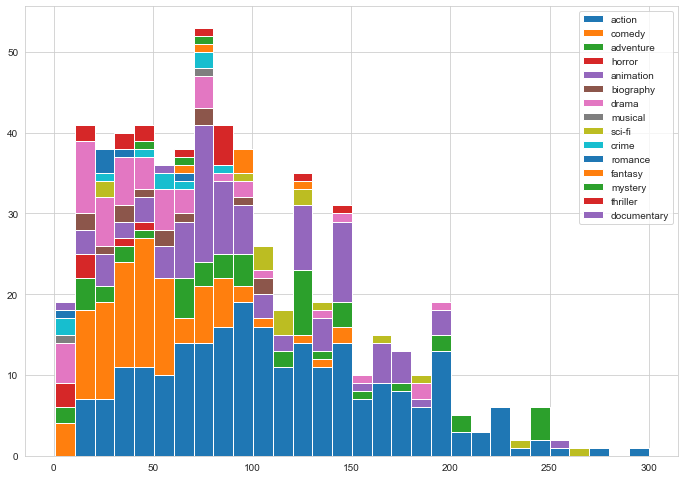

In [67]:
list1=[]
mylabel=[]
    
genres = movie_review.Genre.unique()[0:15]    
for genre in genres:
    list1.append(movie_review[movie_review.Genre==genre].Budget_mill)
    mylabel.append(genre)
sns.set_style('whitegrid')   
fig,ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
h1 = plt.hist(list1,bins=30, stacked=True, rwidth=1,label=mylabel)
plt.legend()
plt.show()

This histogram shows the number of genre at different budget levels

### lets find the top rated genres by IMDB and MovieLens

In [73]:
genre_by_rating =movie_review.groupby('Genre')['IMDb_Rating','MovieLens_Rating'].mean()

print('Top 5 rated genres by IMDb\n      ',genre_by_rating['IMDb_Rating'].sort_values(ascending=False).head(5))

print('\nTop 5 rated genres by MovieLens\n        ',genre_by_rating['MovieLens_Rating'].sort_values(ascending=False).head(5))

Top 5 rated genres by IMDb
       Genre
crime          7.80000
biography      7.80000
fantasy        7.55000
documentary    7.55000
sci-fi         7.44375
Name: IMDb_Rating, dtype: float64

Top 5 rated genres by MovieLens
         Genre
biography    3.779286
crime        3.761000
fantasy      3.581667
sci-fi       3.545625
thriller     3.510667
Name: MovieLens_Rating, dtype: float64


Common top rated movies among the 2 ratings are Crime, Biography, Fantasy and Sci-Fi

### our visualiation would be based on this top 5 ratings

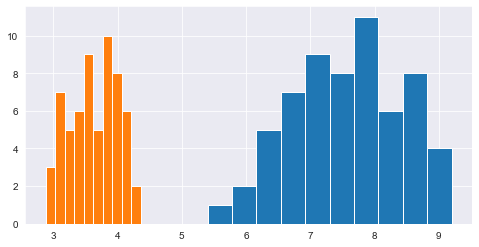

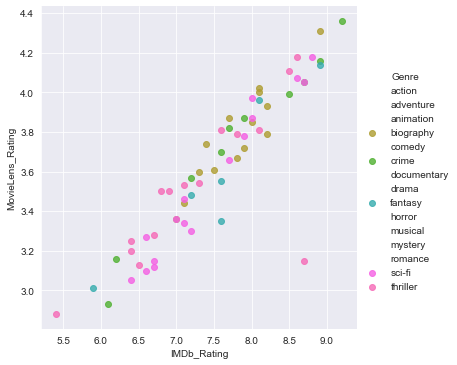

In [74]:
#making a subtable from this genres
subdata = movie_review[movie_review['Genre'].isin(['biography','crime','fantasy','sci-fi','thriller'])]

subdata_year_list = sorted(list(subdata['year'].unique()))

year_plot = subdata_year_list[20:26]

sns.set_style('darkgrid')
h1 = plt.hist(subdata.IMDb_Rating, bins= 10)

h2= plt.hist(subdata.MovieLens_Rating, bins = 10)

lm1=sns.lmplot(data = subdata, x='IMDb_Rating', y='MovieLens_Rating', hue='Genre', fit_reg=False)

### Building an histogram function

In [75]:
def hist(colu):
    """
    function to create an histogram with legend of genre.
    you are allowed to enter the column you want to see the historgram for
    """
    list1 =[]
    mylabel = []
    sub_genres = list(subdata.Genre.unique())
    for genre in sub_genres:
        list1.append(subdata[subdata.Genre == genre][colu])
        mylabel.append(genre)
#     sns.set_style('whitegrid')
#     fig,ax = plt.subplots()
#     fig.set_size_inches(11.7,8.27)
    
    sns.set_style('whitegrid')   
    fig,ax = plt.subplots()
    fig.set_size_inches(11.7,8.27) #size of A4 paper
    plt.hist(list1, stacked=True,label=mylabel)
#     plt.legend()
    plt.title('DISTRIBUTION PLOT', fontsize=35, color='DarkBlue', fontname='Times new roman')

    plt.ylabel('Number of Movies', color ='Red', fontsize=25)
    plt.xlabel(colu, color ='Red',fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.legend(frameon=True,fancybox=True, shadow=True, framealpha=1, prop={'size':20})
    plt.show()

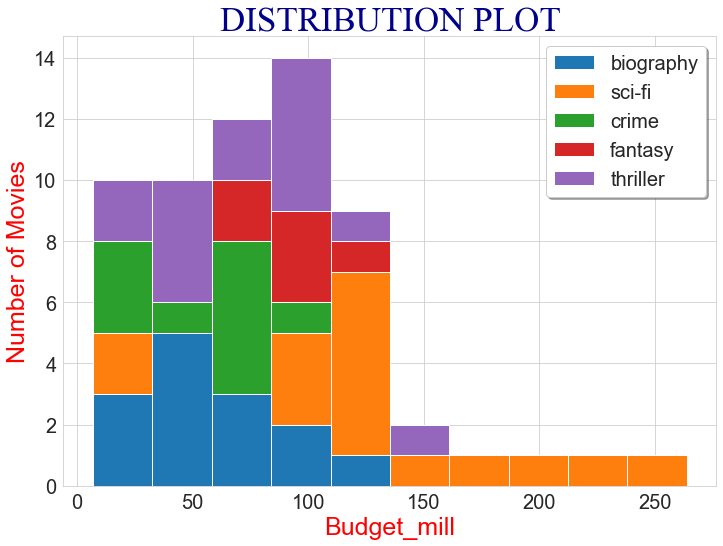

In [76]:
hist('Budget_mill')

### kde plot functions

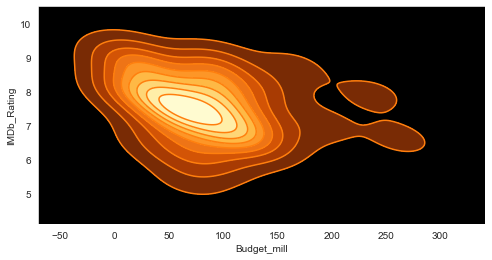

In [77]:
#function to build the kde
def kde_plot(colu1,colu2):
    """
    Input the 2 data columns you would like to view the kde plot for.
    """
    sns.set_style('dark', {"axes.facecolor":"black"})

    sn1 = sns.kdeplot(subdata[colu1], subdata[colu2],shade=True, Shade_lowest=False,
                 cmap='YlOrBr_r')
    sn1 = sns.kdeplot(subdata[colu1], subdata[colu2])
    return

kde_plot('Budget_mill','IMDb_Rating')

In [79]:
# subdata_year.to_csv('subdata_by_genre_year.csv')  #
# we saved the subdata dataset to the system, and colled it back into the program for some processing
subdata_year_import = pd.read_csv('subdata_by_genre_year.csv')

#converting data types
subdata_year_import.year.astype('category')
subdata_year_import.Genre.astype('category')
subdata_year_import.month.astype('category')

0     Nov
1     Nov
2     Feb
3     Oct
4     Dec
5     Feb
6     Jun
7     Nov
8     Mar
9     May
10    Dec
11    Nov
12    Aug
13    Jun
14    Nov
15    Jul
Name: month, dtype: category
Categories (9, object): ['Aug', 'Dec', 'Feb', 'Jul', ..., 'Mar', 'May', 'Nov', 'Oct']

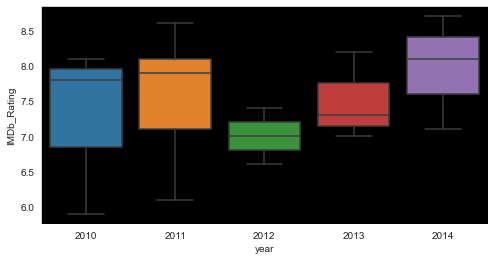

In [83]:
b1=sns.boxplot(data=subdata_year_import, x='year', y='IMDb_Rating')

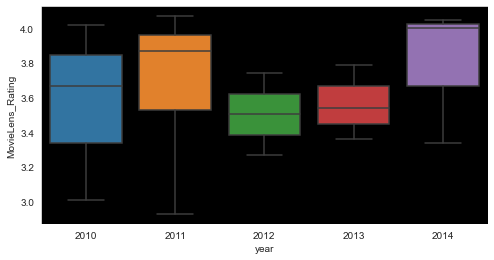

In [82]:
b2=sns.boxplot(data=subdata_year_import, x='year', y='MovieLens_Rating')

we have movies produced in 2014 to be given higher ratings, this could indicate that a lot of nice movies where produced in that era

### DASHBOARD
With a dashboard we can view several visuals and make understanding of several exploration at a glance. Making the view quite fast and very easy.

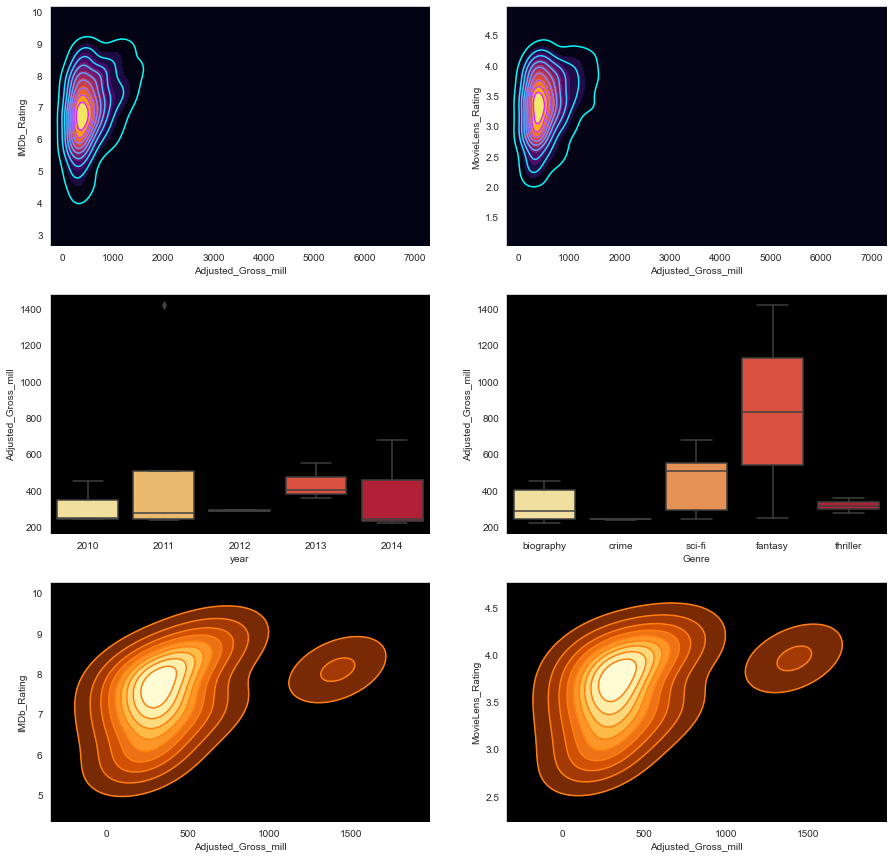

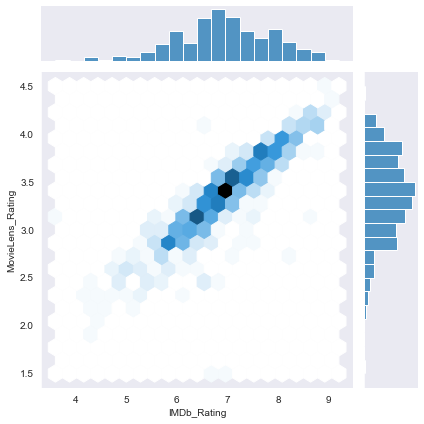

In [89]:
def dashboard(colu):
    """
    this function displays the dashboard built according to the floating or integer datatype column inputed from your dataframe
    colu = specify digit column(i.e dataframe['column name'] where 'column name'= colu)
    """
    
    sns.set_style('dark', {"axes.facecolor":"black"})
    f,axes = plt.subplots(3,2, figsize =(15,15))
    #PLOT 0,0
    k1 = sns.kdeplot(movie_review[colu], movie_review['IMDb_Rating'], \
                     shade=True, shade_lowest=True, cmap='inferno',
                     ax = axes[0,0])
    k1 = sns.kdeplot(movie_review[colu], movie_review['IMDb_Rating'], \
                     cmap= 'cool', ax = axes[0,0])

    #PLOT 0,1
    k2 = sns.kdeplot(movie_review[colu], movie_review['MovieLens_Rating'],\
                    shade=True, shade_lowest=True, cmap='inferno',
                     ax = axes[0,1])

    k2 = sns.kdeplot(movie_review[colu], movie_review['MovieLens_Rating'],\
                     cmap='cool', ax = axes[0,1])


    # #PLOT 1,0
    z = sns.boxplot(data = subdata_year_import, x = 'year',y=colu, ax=axes[1,0],palette ='YlOrRd') #y input

    # PLOT 1,1
    z = sns.boxplot(data = subdata_year_import, x = 'Genre',y=colu, ax=axes[1,1],palette ='YlOrRd') #y input

    # PLOT 2,0
    sn1 = sns.kdeplot(subdata_year_import[colu],subdata_year_import['IMDb_Rating'],
                     shade = True, shade_lowest=False, cmap='YlOrBr_r', ax = axes[2,0])
    sn1 = sns.kdeplot(subdata_year_import[colu],subdata_year_import['IMDb_Rating'],ax=axes[2,0])

    #PLOT 2,1
    sn2 = sns.kdeplot(subdata_year_import[colu],subdata_year_import['MovieLens_Rating'],
                     shade = True, shade_lowest=False, cmap='YlOrBr_r', ax = axes[2,1])
    sn2 = sns.kdeplot(subdata_year_import[colu],subdata_year_import['MovieLens_Rating'],ax=axes[2,1])

    # PLOT 3,0
    sns.set_style('dark')
    vis4 = sns.jointplot(movie_review['IMDb_Rating'],movie_review['MovieLens_Rating'],kind='hex' )
    return plt.show()

dashboard('Adjusted_Gross_mill')

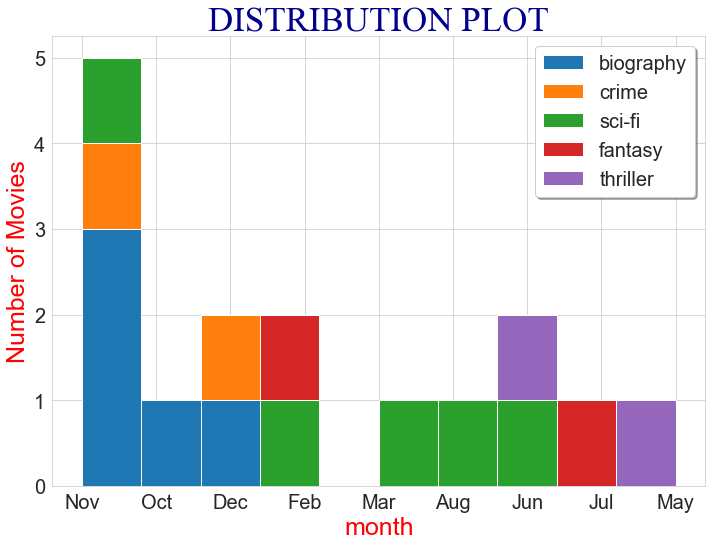

In [96]:
def subdata_hist(colu):
    """
    function to create an histogram with legend of genre.
    you are allowed to enter the column you want to see the historgram for
    """
    list1 =[]
    mylabel = []
    sub_genres = list(subdata_year_import.Genre.unique())
    for genre in sub_genres:
        list1.append(subdata_year_import[subdata_year_import.Genre == genre][colu])
        mylabel.append(genre)
    
    sns.set_style('whitegrid')   
    fig,ax = plt.subplots()
    fig.set_size_inches(11.7,8.27) #size of A4 paper
    plt.hist(list1, stacked=True,label=mylabel)
    plt.title('DISTRIBUTION PLOT', fontsize=35, color='DarkBlue', fontname='Times new roman')

    plt.ylabel('Number of Movies', color ='Red', fontsize=25)
    plt.xlabel(colu, color ='Red',fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.legend(frameon=True,fancybox=True, shadow=True, framealpha=1, prop={'size':20})
    plt.show()
    return

subdata_hist('month')

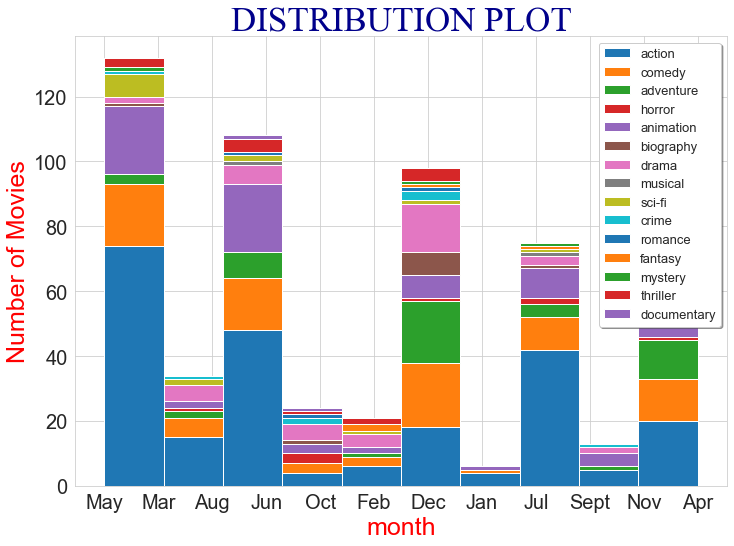

In [97]:
def movie_review_hist(colu):
    """
    function to create an histogram with legend of genre.
    you are allowed to enter the column you want to see the historgram for
    """
    list1 =[]
    mylabel = []
    sub_genres = list(movie_review.Genre.unique())
    for genre in sub_genres:
        list1.append(movie_review[movie_review.Genre == genre][colu])
        mylabel.append(genre)
    
    sns.set_style('whitegrid')   
    fig,ax = plt.subplots()
    fig.set_size_inches(11.7,8.27) #size of A4 paper
    sns.set_style('whitegrid')   
    plt.hist(list1, stacked=True,label=mylabel)

    plt.title('DISTRIBUTION PLOT', fontsize=35, color='DarkBlue', fontname='Times new roman')

    plt.ylabel('Number of Movies', color ='Red', fontsize=25)
    plt.xlabel(colu, color ='Red',fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.legend(frameon=True,fancybox=True, shadow=True, framealpha=1, prop={'size':13})
    plt.show()
    return

movie_review_hist('month')

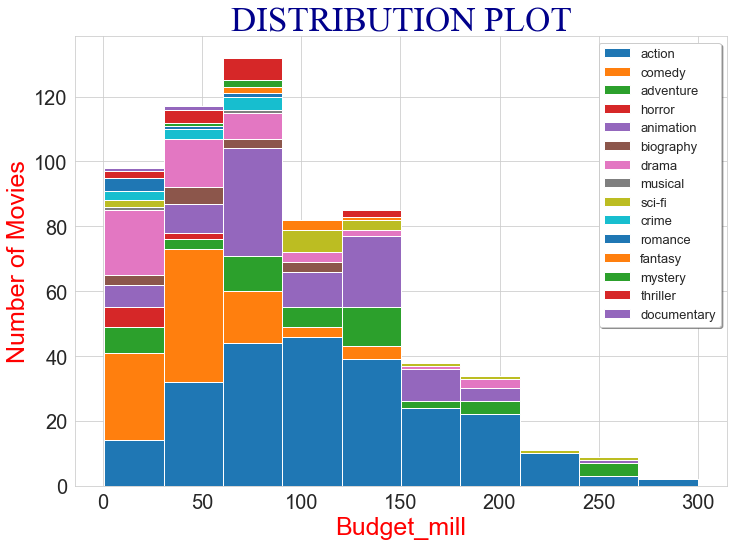

In [98]:
movie_review_hist('Budget_mill')